In [123]:
import numpy as np
import pandas as pd

In [124]:
df=pd.read_csv("spam.csv", encoding="latin1")

In [125]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [126]:
#1.Data cleaning
#2.EDA
#Text processing
#MOdel building
#evaluatain
#improvement
#website
#deploy

1. Data Cleaning

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
#drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [129]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [130]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [131]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
#has to chk missing value 
df.isnull().sum()

target    0
text      0
dtype: int64

In [133]:
#has to chl duplicate value(important)
df.duplicated().sum()

np.int64(403)

In [134]:
# remove duplicate (important)
df=df.drop_duplicates(keep="first")

In [135]:
df.duplicated().sum()

np.int64(0)

2.EDA

In [136]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

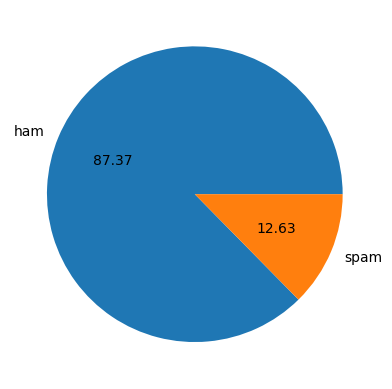

In [137]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()
#slightly data imbalance

In [138]:
import nltk

In [139]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [140]:
df["num_characters"]=df["text"].apply(len)

In [141]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [142]:
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [143]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [144]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [145]:
#ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [146]:
#spam
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [147]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

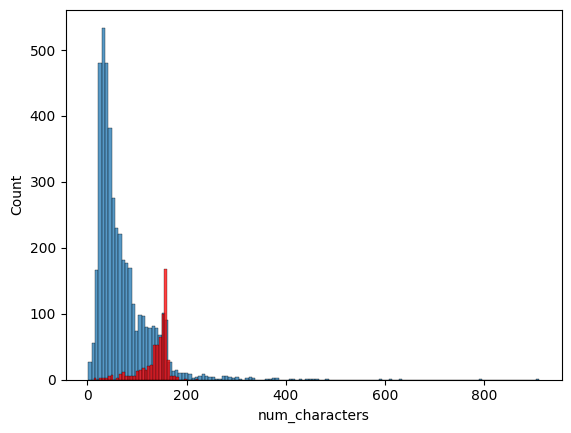

In [148]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color=("red"))

<Axes: xlabel='num_words', ylabel='Count'>

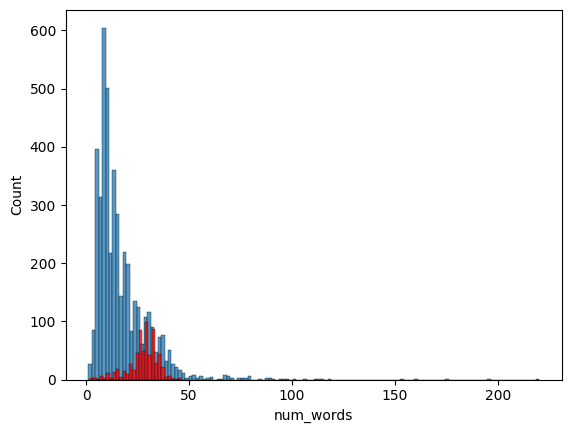

In [149]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color=("red"))

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer #yeee similar words koo hata deta hai aur sirf ek word hi rakhega (read,reads,reading) me see sirf read rakhega aur sbb hata dega


ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:

def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenization
    text = nltk.word_tokenize(text)   # tumne words_tokenization likha tha, galat hai

    y = []
    # 3. Remove non-alphanumeric
    for i in text:
        if i.isalnum():   # sirf alphabets aur numbers allow
            y.append(i)

    text = y[:]   # copy banao
    y.clear()

    # 4. Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]   # copy again
    y.clear()

    # 5. Apply stemming
    for i in text:
        y.append(ps.stem(i))

    # 6. Join back into string
    return " ".join(y)

In [152]:
df["transformed_text"]=df["text"].apply(transform_text)

In [153]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [154]:
#create a wordcloud (WordCloud ek visualization hai jo text ke sabse frequent......
#(baar-baar aane wale) words ko bade aur prominent size me dikhata hai.)
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")


In [155]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

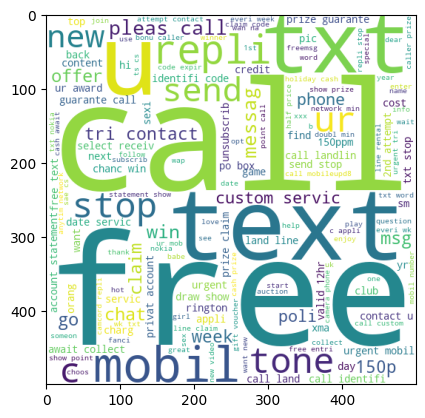

In [156]:
plt.imshow(spam_wc)

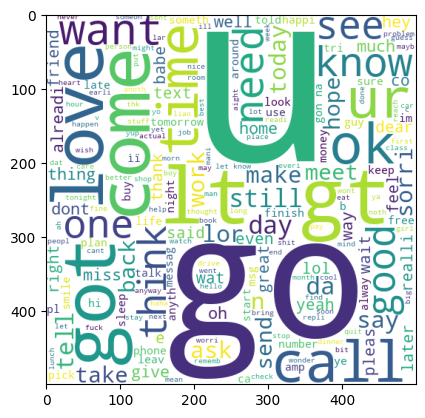

In [157]:
spam_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [158]:
#custom code
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
   for word in msg.split():
       spam_corpus.append(word)

In [159]:
len(spam_corpus)

9939

C:\Users\akash\AppData\Local\Temp\ipykernel_29164\458507721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],


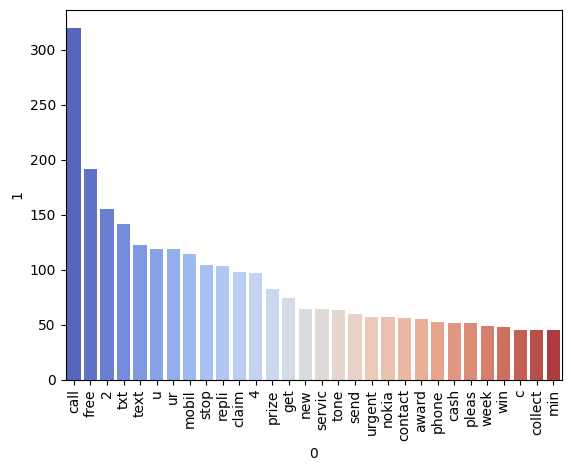

In [160]:
#Ye kisi bhi iterable (list, tuple, string, etc.) me elements ki frequency count karta hai.
#Output ek dictionary jaisa hota hai jisme → element : count.
from collections import Counter
sns.barplot (x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
             y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
             palette="coolwarm")
plt.xticks(rotation ="vertical")
plt.show()

In [161]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
   for word in msg.split():
       ham_corpus.append(word)

In [162]:
len(ham_corpus)

35404

C:\Users\akash\AppData\Local\Temp\ipykernel_29164\1595524588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],


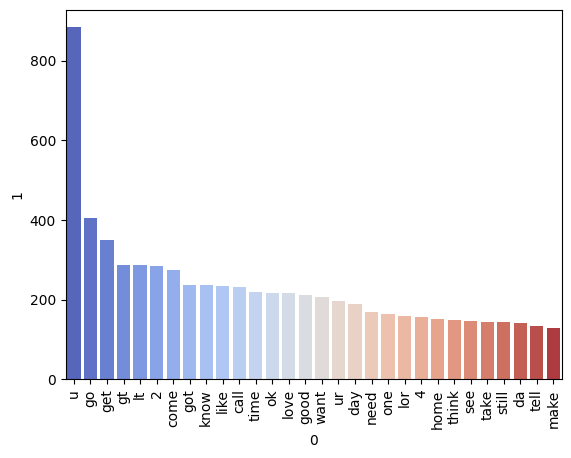

In [163]:
from collections import Counter
sns.barplot (x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
             y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
             palette="coolwarm")
plt.xticks(rotation ="vertical")
plt.show()

4.Model Building

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [165]:
X.shape


(5169, 3000)

In [166]:
y=df["target"].values

In [167]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [171]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [172]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1)) 
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [173]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1)) 
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [174]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1)) 
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [175]:
#choose tfidf--------mnb fn

In [178]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))